In [22]:
!pip install tensorflow
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os


In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sunspots_01.csv')
print(df.tail(5))
## To use the grouping by month and year Datetime conversion method is quiet helpful
df['date'] = pd.to_datetime(df['Month'])
print(df.tail(5))
print(df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
        Month  Sunspots
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4
        Month  Sunspots       date
2815  1983-08      71.8 1983-08-01
2816  1983-09      50.3 1983-09-01
2817  1983-10      55.8 1983-10-01
2818  1983-11      33.3 1983-11-01
2819  1983-12      33.4 1983-12-01
(2820, 3)


      Month  Sunspots       date
1   1749-02      62.6 1749-02-01
2   1749-03      70.0 1749-03-01
3   1749-04      55.7 1749-04-01
4   1749-05      85.0 1749-05-01
5   1749-06      83.5 1749-06-01
6   1749-07      94.8 1749-07-01
7   1749-08      66.3 1749-08-01
8   1749-09      75.9 1749-09-01
9   1749-10      75.5 1749-10-01
10  1749-11     158.6 1749-11-01
11  1749-12      85.2 1749-12-01
12  1750-01      73.3 1750-01-01
13  1750-02      75.9 1750-02-01
14  1750-03      89.2 1750-03-01
15  1750-04      88.3 1750-04-01
16  1750-05      90.0 1750-05-01
17  1750-06     100.0 1750-06-01
18  1750-07      85.4 1750-07-01
19  1750-08     103.0 1750-08-01
20  1750-09      91.2 1750-09-01
21  1750-10      65.7 1750-10-01
22  1750-11      63.3 1750-11-01
23  1750-12      75.4 1750-12-01
24  1751-01      70.0 1751-01-01
25  1751-02      43.5 1751-02-01
26  1751-03      45.3 1751-03-01
27  1751-04      56.4 1751-04-01
28  1751-05      60.7 1751-05-01
29  1751-06      50.7 1751-06-01
30  1751-0

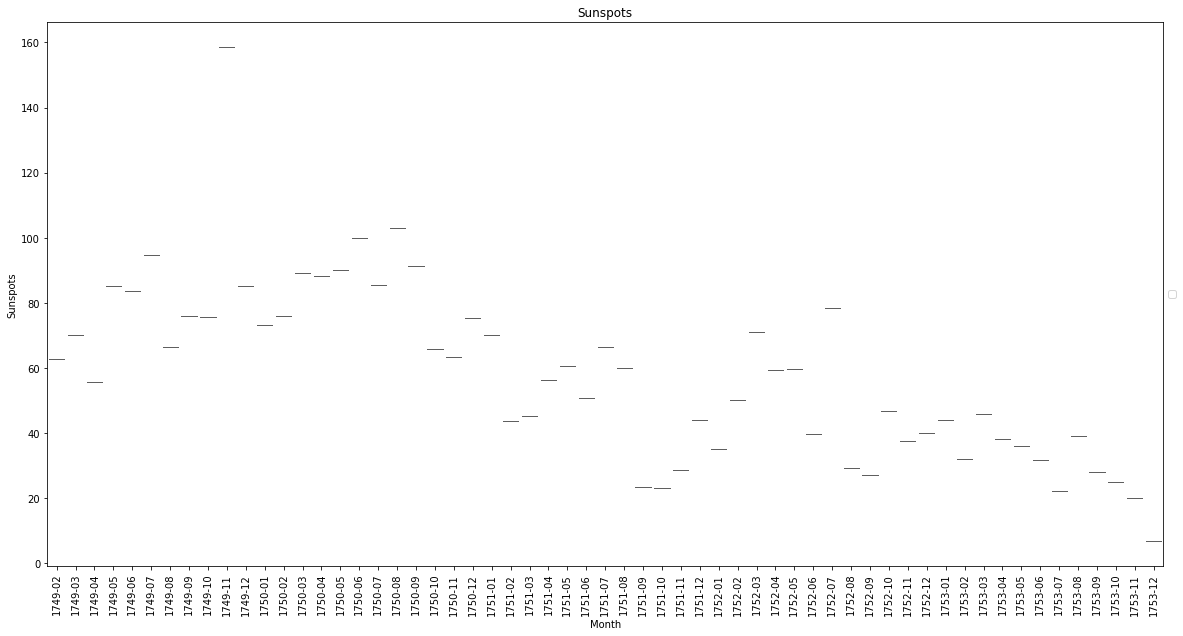

In [ ]:
# Subset into a smaller dataframe for easy visualisation

df1=df[1:60]
print(df1)
print(df1.shape)
print(df1.dtypes)
xlabels = df1['Month']
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='Month', y='Sunspots', data=df1, palette="Set3", linewidth=1)
ax.set_title('Sunspots')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(xlabels, rotation=90)
plt.show()


In [ ]:
df1['Year'] = df1['date'].dt.year

df1.groupby('Year')['Sunspots'].mean()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year
1749    83.009091
1750    83.391667
1751    47.658333
1752    47.800000
1753    30.691667
Name: Sunspots, dtype: float64

In [ ]:
# For every year compute the average value of sunspots and sort the values of sunspots by year
# This will let you know which year the sunspots was minimum and maximum respectively

df1.groupby('Year')['Sunspots'].mean().sort_values()

Year
1753    30.691667
1751    47.658333
1752    47.800000
1749    83.009091
1750    83.391667
Name: Sunspots, dtype: float64

#Minimum Sunspots was in 1753
#Maximum Sunspots was in 1750

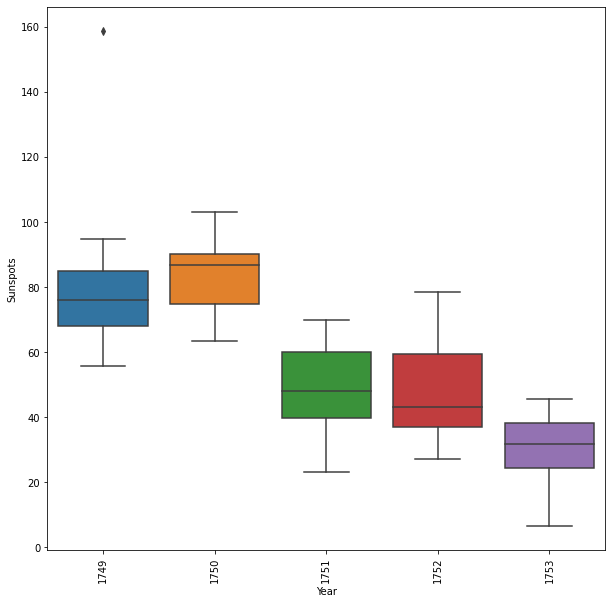

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(data = df1, x='Year',y=('Sunspots'))
for item in ax.get_xticklabels():
    item.set_rotation(90)